# Drug-resistant-tuberculosis-xrays Dataset

Distribución del dataset:
- 512 Tuberculosis pulmonar
- 533 Tuberculosis pulmonar and tuberculosis extrapulmonar


Atributos 

- `filename`
- `study_id`
- `patient_identifier`
- `patient_id`
- `gender`
- `tb_localization` Pulmonary tuberculosis and extrapulmonary tuberculosis y Pulmonary Tuberculosis
- `View Position` AP, PA y LL


In [3]:
import os
import random

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pydicom

## Obtener los nombres de la lista de elementos

In [4]:
direccion_dataset = "/media/josejacomeb/Windows/DatasetTB-Belarus/drug-resistant-tuberculosis-xrays/" #Poner la dirección del dataset aquí
nombre_archivo_atributos = "tbportals_metadata.csv"
ruta_archivo_atributos= os.path.join(direccion_dataset, nombre_archivo_atributos)
ruta_dataset_dcm = os.path.join(direccion_dataset, "images/")
extension_cxr = "dcm"
dataset_datos = pd.read_csv(ruta_archivo_atributos) #Cargar el CSV
##add data about the patient and the xray
posiciones_XRay = []
for i in range(len(dataset_datos)):
    ruta_archivo = os.path.join(ruta_dataset_dcm, dataset_datos["filename"][i])
    plan = pydicom.read_file(ruta_archivo)
    posiciones_XRay.append(plan.ViewPosition)
dataset_datos["Position"] = posiciones_XRay
    

In [30]:
#Función para graficar los datasets
def graficar_dataset(dataset, tamano_x = 8, tamano_y = 10, columnas = 3, filas = 3, ancho_max_txt=23):
    figure = plt.figure(figsize=(tamano_x, tamano_y))
    cols, rows = columnas, filas
    total_datos = len(dataset["filename"])
    for i in range(1, cols * rows + 1):
        sample_idx = int(random.random()*total_datos)
        ruta_archivo = os.path.join(ruta_dataset_dcm, dataset.iloc[sample_idx]["filename"])
        archivo_dicom = pydicom.read_file(ruta_archivo)
        img = archivo_dicom.pixel_array
        img = img.astype("float64")
        img *= (255.0/img.max())
        img = img.astype("uint8")
        condicion = dataset.iloc[sample_idx]["tb_localization"]
        len_condicion = len(condicion)
        if len_condicion > ancho_max_txt:
            condicion_list = list(condicion)
            for iterador in range(ancho_max_txt, len_condicion, ancho_max_txt):
                condicion_list[condicion.find(" ", iterador - 5)] = "\n"
            condicion = ''.join(condicion_list)
        genero = dataset.iloc[sample_idx]["gender"]
        proyeccion = dataset.iloc[sample_idx]["Position"]
        label = "{}\n {}\n Proyección: {}".format(genero, condicion, proyeccion)
        figure.add_subplot(rows, cols, i)
        plt.title(label)
        plt.axis("off")
        plt.imshow(img.squeeze(), cmap="gray")
    return plt

## Característica de los datos
### Descripción 

In [31]:
dataset_datos.describe()

,patient_identifier
count,1050.000000
mean,296.826667
std,181.285618
min,72.000000
25%,181.250000
50%,266.000000
75%,365.000000
max,1229.000000


### Cinco primeros datos

In [15]:
dataset_datos.head()

,filename,study_id,patient_identifier,patient_id,gender,tb_localization,Position
0,1.3.6.1.4.1.25403.158515237678667.5060.2013080...,1.3.6.1.4.1.25403.158515237678667.5060.2013080...,72,6c624eed-fc47-4a7e-8876-af8787f55737,male,Pulmonary tuberculosis and extrapulmonary tube...,AP
1,1.3.6.1.4.1.25403.158515237678667.5060.2013080...,1.3.6.1.4.1.25403.158515237678667.5060.2013080...,73,fc96a846-2c56-42fa-b961-509b6541146d,male,Pulmonary tuberculosis,PA
2,1.3.6.1.4.1.25403.158515237678667.5060.2013080...,1.3.6.1.4.1.25403.158515237678667.5060.2013080...,73,fc96a846-2c56-42fa-b961-509b6541146d,male,Pulmonary tuberculosis,PA
3,1.3.6.1.4.1.25403.158515237678667.5060.2013080...,1.3.6.1.4.1.25403.158515237678667.5060.2013080...,73,fc96a846-2c56-42fa-b961-509b6541146d,male,Pulmonary tuberculosis,PA
4,1.3.6.1.4.1.25403.158515237678667.5060.2013080...,1.3.6.1.4.1.25403.158515237678667.5060.2013080...,74,547489f5-9f2b-479d-90e6-f93caf484957,female,Pulmonary tuberculosis,PA


### Distribución por Género

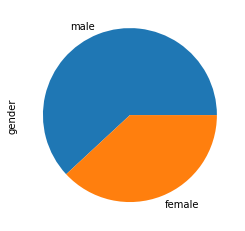

In [6]:
valores_genero = dataset_datos["gender"].value_counts()
valores_genero = valores_genero.plot.pie()

### Histograma por enfermedad

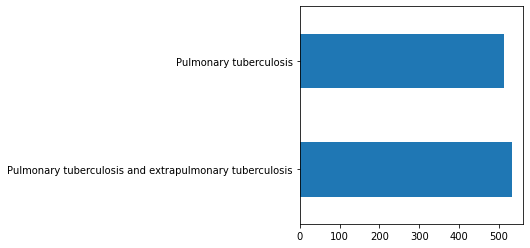

In [7]:
series_enfermedad= dataset_datos["tb_localization"].value_counts()
matplot_condicion = series_enfermedad.plot.barh(figsize=(4,4))

## Distribución por posición

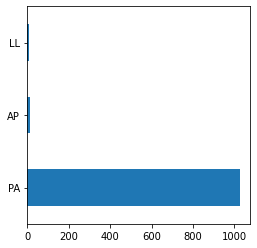

In [17]:
series_enfermedad= dataset_datos["Position"].value_counts()
matplot_condicion = series_enfermedad.plot.barh(figsize=(4,4))

## Graficar todo el dataset Dataset
Gráfica de todo el dataset

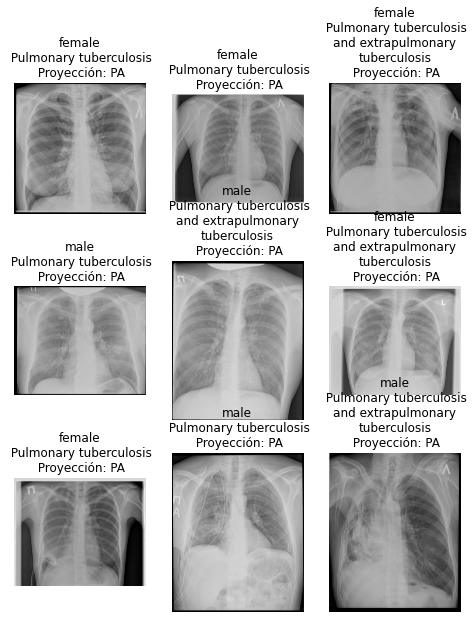

In [32]:
plt = graficar_dataset(dataset_datos)
plt.show()

### Filtrar por Enfermedad
### Tuberculosis Pulmonar


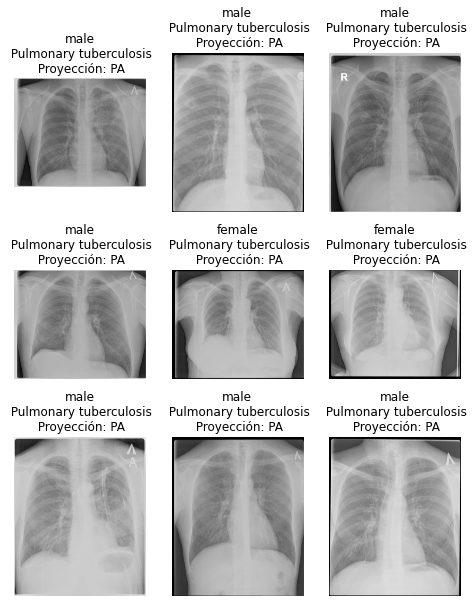

In [33]:
dataset_tb_pulmonar = dataset_datos[dataset_datos["tb_localization"] == "Pulmonary tuberculosis"]
plt = graficar_dataset(dataset_tb_pulmonar)
plt.show()


### Tuberculosis Pulmonar y Tuberculosis Extrapulmonar 

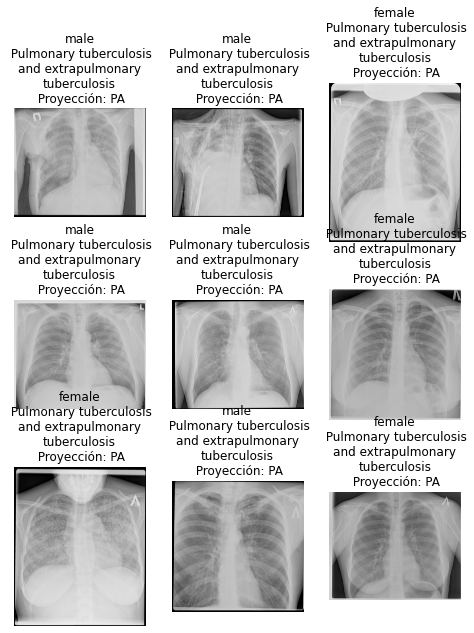

In [34]:
dataset_tb_pulmonar_and_ext = dataset_datos[dataset_datos["tb_localization"] == "Pulmonary tuberculosis and extrapulmonary tuberculosis"]
plt = graficar_dataset(dataset_tb_pulmonar_and_ext)
plt.show()

## Filtro por género
### Hombres

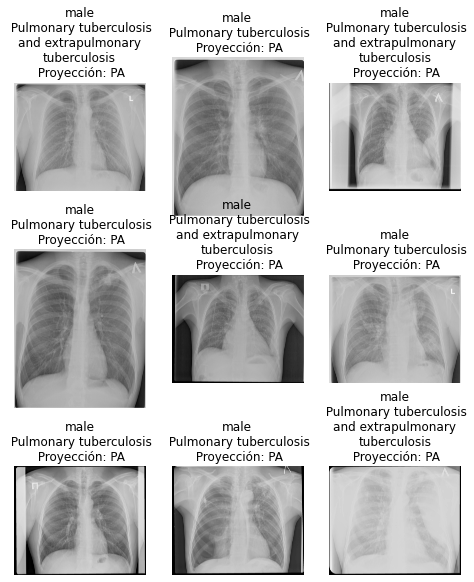

In [35]:
dataset_hombres = dataset_datos[dataset_datos["gender"] == "male"]
plt = graficar_dataset(dataset_hombres)
plt.show()

### Mujeres

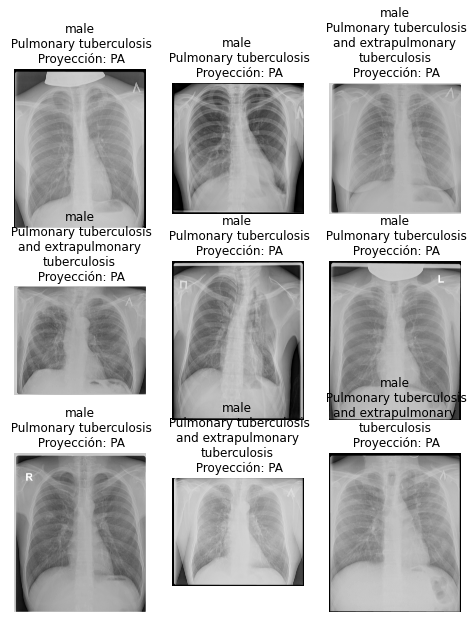

In [36]:
dataset_mujeres = dataset_datos[dataset_datos["gender"] == "female"]
plt = graficar_dataset(dataset_hombres)
plt.show()

## Filtrar por Proyección
### Posterior-Anterior(PA)

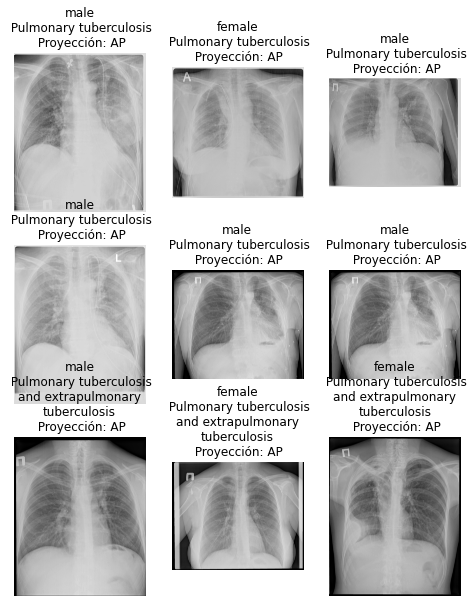

In [37]:
dataset_ap = dataset_datos[dataset_datos["Position"] == "AP"]
plt = graficar_dataset(dataset_ap)
plt.show()

### Anterior-Posterior(AP)

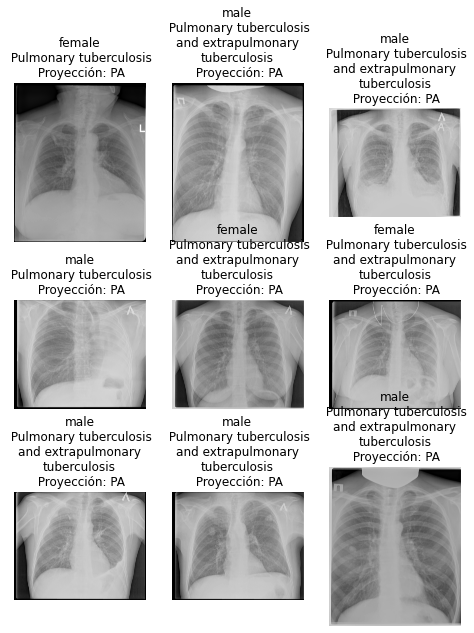

In [38]:
dataset_pa = dataset_datos[dataset_datos["Position"] == "PA"]
plt = graficar_dataset(dataset_pa)
plt.show()

### LL

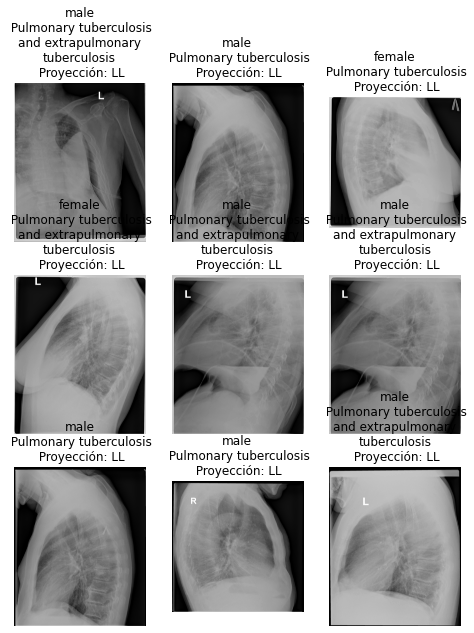

In [39]:
dataset_ll = dataset_datos[dataset_datos["Position"] == "LL"]
plt = graficar_dataset(dataset_ll)
plt.show()

## Convertir DICOM a PNG
Se va a convertir el dataset `dataset_pa`

In [66]:
import cv2
ruta_guardar_dataset="/media/josejacomeb/Datos1/DatasetsMédicos/TB Belarus/"
ruta_guardar_imagenes = "images/"
nombre_archivo_csv = "tbportals_metadata_pa.csv"
ruta_dataset_imagenes = os.path.join(ruta_guardar_dataset, ruta_guardar_imagenes)
ruta_archivo_csv = os.path.join(ruta_guardar_dataset, nombre_archivo_csv)
for idx_dato in range(len(dataset_pa)):
    nombre_archivo_dcm = dataset_pa["filename"].iloc[idx_dato]
    nombre_archivo_png = nombre_archivo_dcm.replace("dcm", "png")
    if not ".png" in nombre_archivo_png:
        nombre_archivo_png += ".png"
    dataset_pa.iloc[idx_dato, 0] = nombre_archivo_png
    ruta_archivo_png = os.path.join(ruta_dataset_imagenes, nombre_archivo_png)
    if not os.path.isfile(ruta_archivo_png):
        ruta_archivo = os.path.join(ruta_dataset_dcm, nombre_archivo_dcm)
        archivo_dicom = pydicom.read_file(ruta_archivo)
        img = archivo_dicom.pixel_array
        img = img.astype("float64")
        img *= (255.0/img.max())
        img = img.astype("uint8")
        cv2.imwrite(ruta_archivo_png, img)
dataset_pa.to_csv(ruta_archivo_csv)
    